In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

In [69]:
import os as os

anime_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','anime.csv')
ratings1_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','rating1.csv')
ratings2_datapath = os.path.join(os.path.dirname(os.getcwd()),'Dataset','rating2.csv')

In [70]:
anime_dataset = pd.read_csv(anime_datapath)

anime_dataset

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [71]:
rating1 = pd.read_csv(ratings1_datapath)

rating1

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
3906863,36791,2795,7
3906864,36791,2904,10
3906865,36791,3270,10
3906866,36791,3299,8


In [72]:
rating2 = pd.read_csv(ratings2_datapath)

rating2

,user_id,anime_id,rating
0,36791,3467,7
1,36791,3503,8
2,36791,3549,9
3,36791,3653,8
4,36791,3654,7
...,...,...,...
3906864,73515,16512,7
3906865,73515,17187,9
3906866,73515,22145,10
3906867,73516,790,9


In [73]:
rating_data = pd.concat([rating1, rating2],axis=0)
rating_data.reset_index(inplace=True)

rating_data

,index,user_id,anime_id,rating
0,0,1,20,-1
1,1,1,24,-1
2,2,1,79,-1
3,3,1,226,-1
4,4,1,241,-1
...,...,...,...,...
7813732,3906864,73515,16512,7
7813733,3906865,73515,17187,9
7813734,3906866,73515,22145,10
7813735,3906867,73516,790,9


In [74]:
# 1. Most Watched Type - Total members per type
most_watched_type = anime_dataset.groupby('type')['members'].sum()

In [75]:
# 2. Number of Anime per Type
anime_count_per_type = anime_dataset['type'].value_counts()

In [76]:
# 4. Top Anime per Type (by rating)
top_anime_per_type = anime_dataset.loc[anime_dataset.groupby('type')['rating'].idxmax()][['type', 'name', 'rating']]


<Figure size 4000x2000 with 0 Axes>

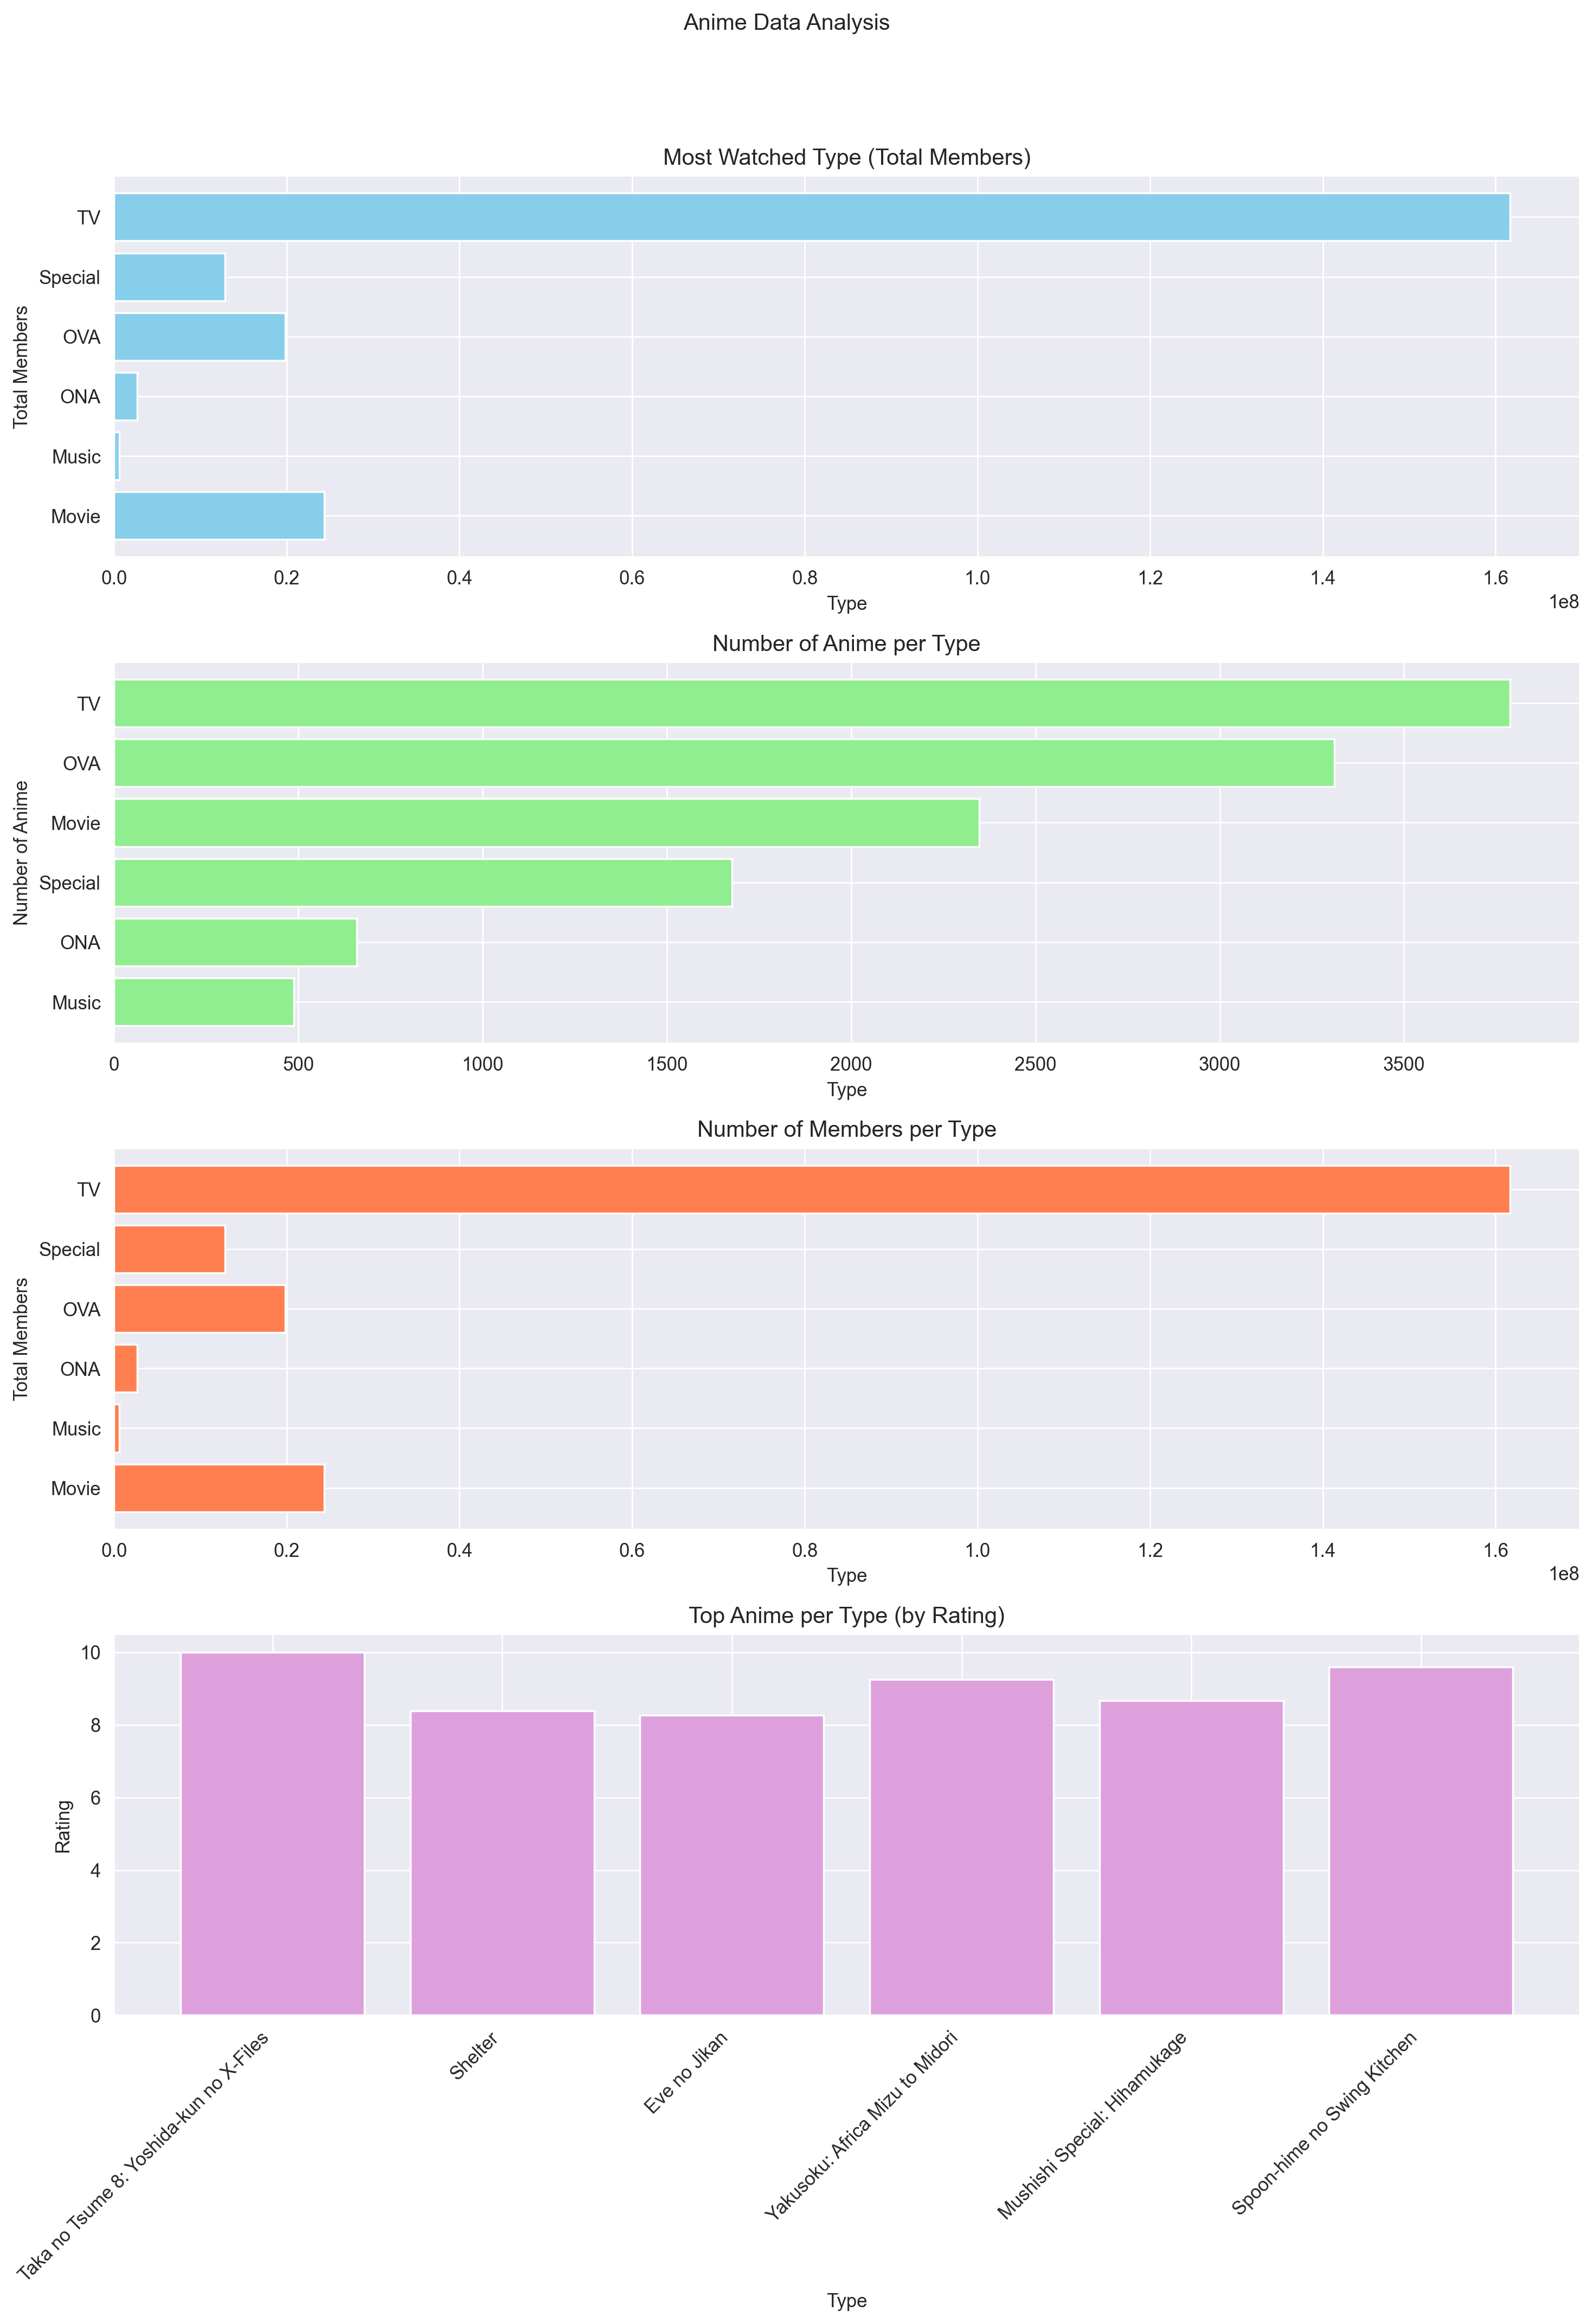

In [77]:
# Plotting the graphs
fig, axs = plt.subplots(4, 1, figsize=(12, 18))
fig.suptitle("Anime Data Analysis")

# Plot 1: Most Watched Type (Total Members per Type)
axs[0].barh(most_watched_type.index, most_watched_type.values, color='skyblue')
axs[0].set_title("Most Watched Type (Total Members)")
axs[0].set_xlabel("Type")
axs[0].set_ylabel("Total Members")


# Plot 2: Number of Anime per Type
axs[1].barh(anime_count_per_type.index, anime_count_per_type.values, color='lightgreen')
axs[1].set_title("Number of Anime per Type")
axs[1].set_xlabel("Type")
axs[1].set_ylabel("Number of Anime")
axs[1].invert_yaxis()

# Plot 3: Number of Members per Type (Repeating plot for this small example)
axs[2].barh(most_watched_type.index, most_watched_type.values, color='coral')
axs[2].set_title("Number of Members per Type")
axs[2].set_xlabel("Type")
axs[2].set_ylabel("Total Members")

# Plot 4: Top Anime per Type
axs[3].bar(top_anime_per_type['type'], top_anime_per_type['rating'], color='plum')
axs[3].set_title("Top Anime per Type (by Rating)")
axs[3].set_xlabel("Type")
axs[3].set_ylabel("Rating")
axs[3].set_xticks(range(len(top_anime_per_type['type'])))
axs[3].set_xticklabels(top_anime_per_type['name'], rotation=45, ha='right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()